# 📘 Pre-entrega

**Nombre del alumno:** Nancy M. Montenovo

## 🧩 Etapa 1: Recopilación y Preparación de Datos
**Objetivo:** Demostrar habilidades en Python, familiaridad con el entorno de trabajo y conocimientos básicos sobre manipulación de datos.

### 1️⃣ Carga de datos

**Etapa inicial**

*   Cargar los datasets como DataFrames usando pandas.
*   Uso de pd.read_csv() para cargar los archivos CSV.
*   Verificación de la ruta correcta
*   Revisión de las primeras filas con .head().



In [73]:
import pandas as pd
import numpy as np

In [74]:
# Montar la unidad
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
# Cargar los archivos csv que se encuentren en la carpeta datasets
import os
os.listdir("/content/drive/MyDrive/datasets")

['marketing.csv',
 'clientes.csv',
 'ventas.csv',
 'ventas_clean.csv',
 'clientes_clean.csv',
 'marketing_clean.csv',
 'marketing_clean_NM.csv',
 'clientes_clean_NM.csv',
 'ventas_clean_NM.csv',
 'ventas_clean.gsheet']

In [76]:
# Definimos las rutas de los datasets.
# Aquí dejamos rutas relativas para que sea fácil reemplazarlas si cambia la ubicación.
ruta_ventas = "/content/drive/MyDrive/datasets/ventas.csv"
ruta_clientes = "/content/drive/MyDrive/datasets/clientes.csv"
ruta_marketing = "/content/drive/MyDrive/datasets/marketing.csv"

# Cargamos los CSV como DataFrames.
ventas = pd.read_csv(ruta_ventas)
clientes = pd.read_csv(ruta_clientes)
marketing = pd.read_csv(ruta_marketing)

# Validamos formas para comprobar que se cargaron correctamente.
print("ventas.shape ->", ventas.shape)
print("clientes.shape ->", clientes.shape)
print("marketing.shape ->", marketing.shape)

# Mostramos las primeras filas de cada dataset para corroborar estructura de columnas.
display(ventas.head(3))
display(clientes.head(3))
display(marketing.head(3))

ventas.shape -> (3035, 6)
clientes.shape -> (567, 5)
marketing.shape -> (90, 6)


,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,$69.94,5.0,02/01/2024,Decoración
1,811,Lámpara de mesa,$105.10,5.0,02/01/2024,Decoración
2,1156,Secadora,$97.96,3.0,02/01/2024,Electrodomésticos


,id_cliente,nombre,edad,ciudad,ingresos
0,1,Aloysia Screase,44,Mar del Plata,42294.68
1,2,Kristina Scaplehorn,25,Posadas,24735.04
2,3,Filip Castagne,50,Resistencia,35744.85


,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,20/03/2024,03/05/2024
1,12,Tablet,RRSS,3.40,26/03/2024,13/05/2024
2,32,Lámpara de mesa,Email,5.54,28/03/2024,20/04/2024


### 2️⃣ Análisis exploratorio inicial

*   Análisis exploratorio inicial de los DataFrames usando métodos como .info(), .describe(), .shape y .columns. dtypes.
> Esto permite entender la estructura y el contenido de los datos.
> Se incluyen comentarios sobre los resultado obtenidos inicialmente.


In [77]:
#Definición de una función para hacer el análisis exploratorio de los diferentes df
def eda(df, nombre):
    print(f"=== {nombre} ===")
    print("shape:", df.shape)
    print("columnas:", list(df.columns))
    print("dtypes:")
    print(df.dtypes)
    print("\nNulos por columna:")
    print(df.isna().sum())
    print("\nPrimeras filas:")
    display(df.head(5))
    print("\nDescribe (numérico):")
    display(df.describe(include='number'))
    print("-"*100)

In [78]:
#se llama a la función "eda" para validar el df "Ventas"
eda(ventas, "VENTAS (inicial)")

=== VENTAS (inicial) ===
shape: (3035, 6)
columnas: ['id_venta', 'producto', 'precio', 'cantidad', 'fecha_venta', 'categoria']
dtypes:
id_venta         int64
producto        object
precio          object
cantidad       float64
fecha_venta     object
categoria       object
dtype: object

Nulos por columna:
id_venta       0
producto       0
precio         2
cantidad       2
fecha_venta    0
categoria      0
dtype: int64

Primeras filas:


,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,$69.94,5.0,02/01/2024,Decoración
1,811,Lámpara de mesa,$105.10,5.0,02/01/2024,Decoración
2,1156,Secadora,$97.96,3.0,02/01/2024,Electrodomésticos
3,1372,Heladera,$114.35,8.0,02/01/2024,Electrodomésticos
4,1546,Secadora,$106.21,4.0,02/01/2024,Electrodomésticos



Describe (numérico):


,id_venta,cantidad
count,3035.000000,3033.000000
mean,1499.851400,6.496538
std,866.465379,3.457250
min,1.000000,1.000000
25%,748.500000,3.000000
50%,1502.000000,7.000000
75%,2249.500000,9.000000
max,3000.000000,12.000000


----------------------------------------------------------------------------------------------------


Como resultado de la exploración del df **Ventas**, se puede concluir que:


*   Está compuesto de 3035 filas y 6 columnas
*   Las columnas producto, precio, fecha_venta y categoria son del tipo object y la cantidad tipo float64
*   Hay dos elementos nulos en las columnas precio y cantidad
*   El precio al tener el valor $ no lo está mostrando como valor numérico




In [79]:
#se llama a la función "eda" para validar el df "clientes"
eda(clientes, "CLIENTES (inicial)")

=== CLIENTES (inicial) ===
shape: (567, 5)
columnas: ['id_cliente', 'nombre', 'edad', 'ciudad', 'ingresos']
dtypes:
id_cliente      int64
nombre         object
edad            int64
ciudad         object
ingresos      float64
dtype: object

Nulos por columna:
id_cliente    0
nombre        0
edad          0
ciudad        0
ingresos      0
dtype: int64

Primeras filas:


,id_cliente,nombre,edad,ciudad,ingresos
0,1,Aloysia Screase,44,Mar del Plata,42294.68
1,2,Kristina Scaplehorn,25,Posadas,24735.04
2,3,Filip Castagne,50,Resistencia,35744.85
3,4,Liuka Luard,39,Bahía Blanca,27647.96
4,5,Dore Cockshtt,28,Rosario,28245.65



Describe (numérico):


,id_cliente,edad,ingresos
count,567.000000,567.000000,567.000000
mean,284.000000,37.940035,34668.739012
std,163.823075,10.202885,12974.531446
min,1.000000,20.000000,170.290000
25%,142.500000,30.000000,26015.240000
50%,284.000000,37.000000,35066.830000
75%,425.500000,43.000000,42457.100000
max,567.000000,81.000000,88053.010000


----------------------------------------------------------------------------------------------------


Como resultado de la exploración del df **Clientes**, se puede concluir que:

* Está compuesto de 567 filas y 5 columnas
* Las columnas nombre y ciudad son del tipo object, edad tipo entero e ingresos float64.
* No existen elementos nulos

In [80]:
#se llama a la función "eda" para validar el df "marketing"
eda(marketing, "MARKETING (inicial)")

=== MARKETING (inicial) ===
shape: (90, 6)
columnas: ['id_campanha', 'producto', 'canal', 'costo', 'fecha_inicio', 'fecha_fin']
dtypes:
id_campanha       int64
producto         object
canal            object
costo           float64
fecha_inicio     object
fecha_fin        object
dtype: object

Nulos por columna:
id_campanha     0
producto        0
canal           0
costo           0
fecha_inicio    0
fecha_fin       0
dtype: int64

Primeras filas:


,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,20/03/2024,03/05/2024
1,12,Tablet,RRSS,3.40,26/03/2024,13/05/2024
2,32,Lámpara de mesa,Email,5.54,28/03/2024,20/04/2024
3,21,Smartphone,RRSS,6.37,29/03/2024,16/05/2024
4,58,Alfombra,Email,4.25,31/03/2024,05/05/2024



Describe (numérico):


,id_campanha,costo
count,90.000000,90.000000
mean,45.500000,4.928667
std,26.124701,0.947750
min,1.000000,2.950000
25%,23.250000,4.372500
50%,45.500000,4.900000
75%,67.750000,5.562500
max,90.000000,7.390000


----------------------------------------------------------------------------------------------------


Como resultado de la exploración del df  **marketing**, se puede concluir que:

* Está compuesto de 90 filas y 6 columnas
* Las columnas producto, canal, fecha_inicio y fecha_fin son del tipo object, y costo tipo float64
* No existen elementos nulos
* Se deberán modificar las fechas a datatime

### 3️⃣ Calidad de los datos

* Identificar valores nulos y duplicados en los conjuntos de datos.
> Sugerencia: usar .isna().sum() y .duplicated().sum().
> Documentar las observaciones con print() o comentarios.

In [81]:
# ============================================
# 🔍 FUNCIÓN DE CONTROL DE CALIDAD DE DATOS
# ============================================
# Esta función analiza un DataFrame existente (df) y muestra:
# 1️⃣ La cantidad de valores nulos por columna.
# 2️⃣ El total de filas completamente duplicadas.
# 3️⃣ Si se especifica una columna clave, los valores más repetidos de esa clave.

def calidad(df, nombre, clave=None):
    """
    Analiza la calidad del DataFrame:
      - Muestra cantidad de nulos por columna.
      - Cuenta filas duplicadas completas.
      - Si se indica una clave, muestra los valores duplicados más frecuentes.
    Parámetros:
      df: DataFrame de pandas que se analizará.
      nombre: texto descriptivo del DataFrame (ejemplo: 'VENTAS').
      clave: (opcional) nombre de la columna para buscar duplicados específicos.
    """

    # -------------------------------------------------
    # Mostrar título descriptivo con el nombre del DF
    # -------------------------------------------------
    print(f"### {nombre}")

    # -------------------------------------------------
    # Mostrar cantidad de valores nulos por columna
    # -------------------------------------------------
    # df.isna() devuelve un DataFrame booleano con True donde hay NaN.
    # .sum() cuenta los True (o sea, los nulos) por columna.
    # .to_frame("nulos") convierte el resultado en un DataFrame con una columna llamada 'nulos'.
    display(df.isna().sum().to_frame("nulos"))

    # -------------------------------------------------
    # Contar filas duplicadas completas
    # -------------------------------------------------
    # df.duplicated(keep=False) marca como True todas las filas que tienen otra igual.
    # keep=False significa que marca todas las copias, no solo una.
    # .sum() cuenta cuántas filas están repetidas.
    dup_rows = df.duplicated(keep=False).sum()
    print("Filas duplicadas (exactas):", dup_rows)

    # -------------------------------------------------
    # Si se especificó una columna clave válida, analizar duplicados por esa columna
    # -------------------------------------------------
    # if clave analiza que clave no sea None
    # and (y)
    if clave and clave in df.columns:
    # clave in df.columns-- >que clave sea una columna existente dentro de las columnas del dataframe
    # si no le paso ninguna columna no va a querer encontrar duplicados por columna
    # y si me equivoco y le paso una columna que no existe en el dataframe, tampoco ingresara al if.
        # Contar cuántas filas tienen valores repetidos en esa columna
        dup_key = df[clave].duplicated(keep=False).sum()
        print(f"Duplicados por clave '{clave}':", dup_key)

        # Si existen duplicados, mostrar cuáles son los valores más repetidos
        if dup_key > 0:
            # Filtrar filas donde esa clave esté duplicada
            # df[clave].duplicated(keep=False) devuelve True donde el valor se repite
            duplicados_ordenados = (
                df[df[clave].duplicated(keep=False)][clave]
                .value_counts()                # Cuenta cuántas veces aparece cada valor
                .sort_values(ascending=False)   # Ordena de mayor a menor (más duplicados arriba)
            )

            print("\n🔁 Top valores duplicados más frecuentes:")
            # Mostrar solo los primeros 10 (los más repetidos)
            display(duplicados_ordenados.head(10))
        else:
            print(f"No se encontraron duplicados en la clave '{clave}'.")
    else:
        # Si la clave no fue pasada o no existe en el DataFrame
        if clave:
            print(f"La clave '{clave}' no existe en el DataFrame.")
        else:
            print("No se indicó una clave para analizar duplicados por columna.")
#fin de def calidad


In [82]:
# se llama a la función "calidad" para analizar nulos, duplicados en el df **Ventas**
calidad(ventas, "VENTAS", clave="id_venta")

### VENTAS


,nulos
id_venta,0
producto,0
precio,2
cantidad,2
fecha_venta,0
categoria,0


Filas duplicadas (exactas): 70
Duplicados por clave 'id_venta': 70

🔁 Top valores duplicados más frecuentes:


,count
id_venta,
56,2
421,2
424,2
1868,2
2545,2
2778,2
145,2
300,2
439,2


Como resultado de la exploración del df  **ventas**, se puede concluir que:

* Existen 2 nulos en las columnas precio y cantidad
* Existen 70 filas duplicadas
* Al buscar por clave id_venta también devuelve 70 registros duplicados
* 2 es la cantidad de veces que mayor se repite un registro

**Requiere llevar a cabo limpieza de datos**

In [83]:
# se llama a la función "calidad" para analizar nulos, duplicados en el df **Clientes**
calidad(clientes, "CLIENTES", clave="id_cliente")

### CLIENTES


,nulos
id_cliente,0
nombre,0
edad,0
ciudad,0
ingresos,0


Filas duplicadas (exactas): 0
Duplicados por clave 'id_cliente': 0
No se encontraron duplicados en la clave 'id_cliente'.


Como resultado de la exploración del df  **clientes**, se puede concluir que:

* No existen nulos en el df
* No existen filas duplicadas
* No existen filas duplicadas por clave id_cliente

**No se debe llevar a cabo limpieza de datos**

In [84]:
# se llama a la función "calidad" para analizar nulos, duplicados en el df **Marketing**
calidad(marketing, "MARKETING", clave="id_campanha")

### MARKETING


,nulos
id_campanha,0
producto,0
canal,0
costo,0
fecha_inicio,0
fecha_fin,0


Filas duplicadas (exactas): 0
Duplicados por clave 'id_campanha': 0
No se encontraron duplicados en la clave 'id_campanha'.


Como resultado de la exploración del df  **marketing**, se puede concluir que:

* No existen nulos
* No existen filas duplicadas
* No existen filas duplicadas al buscar por clave id_campanha

**No se debe llevar a cabo limpieza de datos**

## 🧹 Etapa 2: Preprocesamiento y Limpieza de Datos
**Objetivo:** Demostrar conocimiento de las técnicas de limpieza y transformación de datos.

### 4️⃣ Limpieza de datos
* Limpiar el conjunto de datos eliminando duplicados y caracteres no deseados.
* Sugerencia: aplicar .drop_duplicates(), .str.strip(), .str.replace() según el caso.
* Documentar el proceso y los resultados.

In [85]:
# ============================================
# 🧹 LIMPIEZA Y NORMALIZACIÓN DE LOS DATASETS
# ============================================
# Creación de una función para hacer limpieza y normalización de los DataFrames:
#   ventas, clientes, marketing
# Pasos:
# Eliminar duplicados.
# Normalizar **texto** en columnas `object` (trim + capitalización simple).
# Convertir fechas a fechas reales
# Convertir `precio` y `cantidad` a numéricos si existen.
# Guardar CSV limpios.
# ============================================
# -------------------------------------------------
# 1️⃣ Crear copias independientes para no modificar los df originales
# -------------------------------------------------
ventas_clean = ventas.copy() #el nuevo df se guarda en ventas_clean
clientes_clean = clientes.copy() #el nuevo df se guarda en clientes_clean
marketing_clean = marketing.copy() #el nuevo df se guarda en marketing_clean

# -------------------------------------------------
# 2️⃣ Eliminar filas completamente duplicadas
# -------------------------------------------------
ventas_clean = ventas_clean.drop_duplicates()
clientes_clean = clientes_clean.drop_duplicates()
marketing_clean = marketing_clean.drop_duplicates()

In [86]:
#se llama a la función "calidad" para análisis de ventas_clean
calidad(ventas_clean, "VENTAS CLEAN", clave="id_venta")
print ("shape:",ventas_clean.shape)

### VENTAS CLEAN


,nulos
id_venta,0
producto,0
precio,2
cantidad,2
fecha_venta,0
categoria,0


Filas duplicadas (exactas): 0
Duplicados por clave 'id_venta': 0
No se encontraron duplicados en la clave 'id_venta'.
shape: (3000, 6)


Como resultado de la limpieza del df  **ventas_clean**, se puede concluir que:

* Los elementos nulos persisten ya que no se ha aplicado ninguna operación sobre los mismos
* Se removieron 35 filas duplicadas
* No existen filas duplicadas al buscar por clave id_venta
* El nuevo df ventas_clean contiene 3000 filas y 6 columnas


In [87]:
#se llama a la función "calidad" para hacer análisis de clientes_clean
calidad(clientes_clean, "CLIENTES CLEAN", clave="id_cliente")
print ("shape:",clientes_clean.shape)

### CLIENTES CLEAN


,nulos
id_cliente,0
nombre,0
edad,0
ciudad,0
ingresos,0


Filas duplicadas (exactas): 0
Duplicados por clave 'id_cliente': 0
No se encontraron duplicados en la clave 'id_cliente'.
shape: (567, 5)


Como resultado de la limpieza del df clientes_clean, se puede concluir que:

* El df clientes_clean no sufre cambios, ya que no contenía duplicados.

In [88]:
#se llama a la función "calidad" para hacer análisis de marketing_clean
calidad(marketing_clean, "MARKETING CLEAN", clave="id_campanha")
print ("shape:",marketing_clean.shape)

### MARKETING CLEAN


,nulos
id_campanha,0
producto,0
canal,0
costo,0
fecha_inicio,0
fecha_fin,0


Filas duplicadas (exactas): 0
Duplicados por clave 'id_campanha': 0
No se encontraron duplicados en la clave 'id_campanha'.
shape: (90, 6)


Como resultado de la limpieza del df marketing_clean, se puede concluir que:

* El df marketing_clean no sufre cambios, ya que no contenía duplicados.

In [106]:
# -------------------------------------------------
# 3️⃣ Función para limpiar texto en columnas tipo string
# -------------------------------------------------
def normalizar_texto(df):
    for col in df.select_dtypes(include="object").columns:
        # Se agrupan las operaciones entre paréntesis () para escribirlas en varias líneas
        # Python evalúa todo el bloque como una única expresión.
        df[col] = (
            df[col]
            .astype(str)                              # Convierte cualquier tipo a string
            # .astype(str)  → convierte todo a texto; no tiene parámetros adicionales.
            .str.strip()                               # Elimina espacios al inicio y final
            # .str.strip() no necesita argumentos; borra espacios en blanco por defecto.
            .str.replace(r"[\u200b\t\r\n]", "", regex=True)
            # .str.replace(patron, reemplazo, regex=True)
            #   patron: expresión regular que busca caracteres invisibles (\u200b, tabulaciones, saltos)
            #   reemplazo: ""  → los elimina
            #   regex=True indica que 'patron' es una expresión regular.
            .str.replace(" +", " ", regex=True)
            # reemplaza "uno o más espacios consecutivos" por un solo espacio
            .str.upper()       # Convierte a mayusculas: "juan pérez" → "JUAN  PÉREZ"
        )
        #df_transformado=df[col].astype(str)
        #df_transformado=df_transformado.str.strip()
        #df_transformado=df_transformado.str.replace(r"[\u200b\t\r\n]", "", regex=True)
        #df_transformado=df_transformado.str.replace(" +", " ", regex=True)
        #df_transformado=df_transformado.str.title()
        #df[col]=df_transformado

        #df[col] = df[col].astype(str).str.strip().str.replace(r"[\u200b\t\r\n]", "", regex=True).str.replace(" +", " ", regex=True).str.title()
    return df

In [90]:
# -------------------------------------------------
# Normalizar fechas
# -------------------------------------------------
# Si alguna columna contiene fechas (por ejemplo "fecha" o "fechanotificacion"),
# se intenta convertir a formato datetime de pandas.
# to_datetime intenta interpretar el formato y transforma valores inválidos en NaT (Not a Time).

for df in [ventas_clean, clientes_clean, marketing_clean]:
    for col in df.columns:
        if "fecha" in col.lower():  # detecta columnas con la palabra "fecha"
            df[col] = pd.to_datetime(df[col], errors="coerce", dayfirst=True)
            # Parámetros:
            #   errors="coerce" → convierte valores no válidos en NaT (evita error)
            #   dayfirst=True   → interpreta formatos tipo "DD/MM/YYYY" (formato latino)
#n


In [91]:
#Se normaliza la columna fecha_venta
print('Ventas Clean')
print(ventas_clean.dtypes)


Ventas Clean
id_venta                int64
producto               object
precio                 object
cantidad              float64
fecha_venta    datetime64[ns]
categoria              object
dtype: object


In [92]:
#No existe columna fecha, por lo tanto no hay cambios en clientes_clean
print('Clientes Clean')
print(clientes_clean.dtypes)

Clientes Clean
id_cliente      int64
nombre         object
edad            int64
ciudad         object
ingresos      float64
dtype: object


In [93]:
#Se normalizan las columnas fecha_inicion y fecha_fin
print('Marketing Clean')
print(marketing_clean.dtypes)

Marketing Clean
id_campanha              int64
producto                object
canal                   object
costo                  float64
fecha_inicio    datetime64[ns]
fecha_fin       datetime64[ns]
dtype: object


In [107]:
# -------------------------------------------------
#  Aplicar la normalización de texto a "Ventas Clean" llamando a la fucnión  "normalizar_texto"
# -------------------------------------------------
ventas_clean = normalizar_texto(ventas_clean)
print('Ventas Clean luego de la normalización')
display(ventas_clean.head(10))
print()
print(ventas_clean.dtypes)


Ventas Clean luego de la normalización


,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,CUADRO DECORATIVO,69.94,5,2024-01-02,DECORACIÓN
1,811,LÁMPARA DE MESA,105.10,5,2024-01-02,DECORACIÓN
2,1156,SECADORA,97.96,3,2024-01-02,ELECTRODOMÉSTICOS
3,1372,HELADERA,114.35,8,2024-01-02,ELECTRODOMÉSTICOS
4,1546,SECADORA,106.21,4,2024-01-02,ELECTRODOMÉSTICOS
5,1697,HORNO ELÉCTRICO,35.35,9,2024-01-02,ELECTRODOMÉSTICOS
6,1710,PLANCHA DE VAPOR,65.43,2,2024-01-02,ELECTRODOMÉSTICOS
7,2959,PROYECTOR,88.17,9,2024-01-02,ELECTRÓNICA
8,318,RINCÓN DE PLANTAS,79.86,11,2024-01-03,DECORACIÓN
9,419,CANDELABRO,66.11,8,2024-01-03,DECORACIÓN



id_venta                int64
producto               object
precio                float64
cantidad                Int64
fecha_venta    datetime64[ns]
categoria              object
dtype: object


Como resultado de la normalización del df ventas_clean, se puede concluir que:

* Se modifica la columna  fecha_venta a datatime
* Los valores de las columnas Producto y Categoria  se transforman a mayúsculas

In [97]:
# -------------------------------------------------
#  Aplicar la normalización de texto para "Clientes Clean" llamando a la fucnión  "normalizar_texto"
# -------------------------------------------------
clientes_clean = normalizar_texto(clientes_clean)
print('Clientes Clean luego de la normalización')
display(clientes_clean.head(10))
print()
print(clientes_clean.dtypes)

Clientes Clean luego de la normalización


,id_cliente,nombre,edad,ciudad,ingresos
0,1,ALOYSIA SCREASE,44,MAR DEL PLATA,42294.68
1,2,KRISTINA SCAPLEHORN,25,POSADAS,24735.04
2,3,FILIP CASTAGNE,50,RESISTENCIA,35744.85
3,4,LIUKA LUARD,39,BAHÍA BLANCA,27647.96
4,5,DORE COCKSHTT,28,ROSARIO,28245.65
5,6,PATRICK EARLE,34,SAN MIGUEL DE TUCUMÁN,62763.31
6,7,ETAN DEETH,35,RESISTENCIA,37489.71
7,8,BOOTH BIELFELT,40,CÓRDOBA,35255.94
8,9,SHIRL LABONE,29,ROSARIO,27592.08
9,10,ANDY MENDENHALL,52,ROSARIO,37153.94



id_cliente      int64
nombre         object
edad            int64
ciudad         object
ingresos      float64
dtype: object


Como resultado de la normalización del df clientes_clean, se puede concluir que:

* Los valores de las columnas nombre y ciudad  se transforman a mayúsculas

In [98]:
# -------------------------------------------------
#  Aplicar la normalización de texto a "Marketing Clean" llamando a la fucnión  "normalizar_texto"
# -------------------------------------------------
marketing_clean = normalizar_texto(marketing_clean)
print('Marketing Clean luego de la normalización')
display(marketing_clean.head(10))
print()
print(marketing_clean.dtypes)

Marketing Clean luego de la normalización


,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,ADORNO DE PARED,TV,4.81,2024-03-20,2024-05-03
1,12,TABLET,RRSS,3.40,2024-03-26,2024-05-13
2,32,LÁMPARA DE MESA,EMAIL,5.54,2024-03-28,2024-04-20
3,21,SMARTPHONE,RRSS,6.37,2024-03-29,2024-05-16
4,58,ALFOMBRA,EMAIL,4.25,2024-03-31,2024-05-05
5,85,SMARTWATCH,TV,5.07,2024-04-01,2024-05-05
6,36,PLANCHA DE VAPOR,EMAIL,5.41,2024-04-02,2024-06-01
7,57,BATIDORA,EMAIL,4.48,2024-04-10,2024-06-08
8,44,ADORNO DE PARED,EMAIL,5.08,2024-04-13,2024-05-10
9,84,PARLANTES BLUETOOTH,TV,4.42,2024-04-17,2024-05-05



id_campanha              int64
producto                object
canal                   object
costo                  float64
fecha_inicio    datetime64[ns]
fecha_fin       datetime64[ns]
dtype: object


Como resultado de la normalización del df marketing_clean, se puede concluir que:

* Se modifican las columnas  fecha_inicio y fecha_fin a datatime
* Los valores de las columnas Producto y canal  se transforman a mayúsculas

In [108]:
# -------------------------------------------------
# 6️⃣ Normalizar valores numéricos en el df "Ventas Clean"
# -------------------------------------------------
# 🏷️ Campo "precio"
if "precio" in ventas_clean.columns:
    # Se usa nuevamente agrupación con () para encadenar métodos y mantener legibilidad
    ventas_clean["precio"] = (
        ventas_clean["precio"]
        .astype(str)                        # Convierte todo a texto
        .str.replace("$", "", regex=False)  # Elimina el símbolo $
        #   "$" → texto literal a reemplazar
        #   ""  → nuevo valor (vacío)
        #   regex=False → interpreta "$" literalmente, no como expresión regular
        .str.replace(",", "", regex=False)  # Elimina comas de miles 1,000  1000
        .str.strip()                        # Quita espacios sobrantes
    )
    ventas_clean["precio"] = pd.to_numeric(ventas_clean["precio"], errors="coerce")
    # pd.to_numeric convierte texto a número (float o int)
    # Parámetros:
    #   errors="coerce" → reemplaza valores no convertibles con NaN
display(ventas_clean.head(5))
print()
print("Types Ventas Clean")
print(ventas_clean.dtypes)

,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,CUADRO DECORATIVO,69.94,5,2024-01-02,DECORACIÓN
1,811,LÁMPARA DE MESA,105.10,5,2024-01-02,DECORACIÓN
2,1156,SECADORA,97.96,3,2024-01-02,ELECTRODOMÉSTICOS
3,1372,HELADERA,114.35,8,2024-01-02,ELECTRODOMÉSTICOS
4,1546,SECADORA,106.21,4,2024-01-02,ELECTRODOMÉSTICOS



Types Ventas Clean
id_venta                int64
producto               object
precio                float64
cantidad                Int64
fecha_venta    datetime64[ns]
categoria              object
dtype: object


Observación: Se visualiza la transformación del campo **Precio a float**, antes era tipo: object. Se le quita el símbolo peso

In [101]:
# 🧮 Transformación del Campo "cantidad" a Int
if "cantidad" in ventas_clean.columns:
    ventas_clean["cantidad"] = pd.to_numeric(
        ventas_clean["cantidad"], errors="coerce"
    ).astype("Int64")
    # .astype("Int64") usa el tipo entero de pandas que permite valores nulos (NaN)
display(ventas_clean.head(5))
print()
print("Types Ventas Clean")
print(ventas_clean.dtypes)

,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,CUADRO DECORATIVO,69.94,5,2024-01-02,DECORACIÓN
1,811,LÁMPARA DE MESA,105.10,5,2024-01-02,DECORACIÓN
2,1156,SECADORA,97.96,3,2024-01-02,ELECTRODOMÉSTICOS
3,1372,HELADERA,114.35,8,2024-01-02,ELECTRODOMÉSTICOS
4,1546,SECADORA,106.21,4,2024-01-02,ELECTRODOMÉSTICOS



Types Ventas Clean
id_venta                int64
producto               object
precio                float64
cantidad                Int64
fecha_venta    datetime64[ns]
categoria              object
dtype: object


**Resultado**:

* Se visualiza la transformación de la columna **cantidad a Int**, antes era float
* No se llevan a cabo transformaciones sobre clientes_clean y marketing_clean porque los campos numéricos están correctos (edad tipo Int, ingresos y costo tipo float64)

In [109]:
# -------------------------------------------------
# 7️⃣ Guardar los DataFrames limpios como CSV
# -------------------------------------------------
print('----- Ventas Clean -----')
display(ventas_clean.head())
print('----- Info  -----')
ventas_clean.info()
print(ventas_clean.select_dtypes(include="object").columns)
ventas_clean.to_csv("/content/drive/MyDrive/datasets/ventas_clean_NM.csv", index=False)
print()
print('--------Clientes Clean --------')
display(clientes_clean.head())
print('----- Info  -----')
clientes_clean.info()
print(clientes_clean.select_dtypes(include="object").columns)
clientes_clean.to_csv("/content/drive/MyDrive/datasets/clientes_clean_NM.csv", index=False)
print()
print('------Marketing Clean --------')
display(marketing_clean.head())
print('----- Info  -----')
marketing_clean.info()
print(marketing_clean.select_dtypes(include="object").columns)
marketing_clean.to_csv("/content/drive/MyDrive/datasets/marketing_clean_NM.csv", index=False)
print()
print("✅ Archivos guardados: ventas_clean_NM.csv, clientes_clean_NM.csv, marketing_clean_NM.csv")

----- Ventas Clean -----


,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,CUADRO DECORATIVO,69.94,5,2024-01-02,DECORACIÓN
1,811,LÁMPARA DE MESA,105.10,5,2024-01-02,DECORACIÓN
2,1156,SECADORA,97.96,3,2024-01-02,ELECTRODOMÉSTICOS
3,1372,HELADERA,114.35,8,2024-01-02,ELECTRODOMÉSTICOS
4,1546,SECADORA,106.21,4,2024-01-02,ELECTRODOMÉSTICOS


----- Info  -----
<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 0 to 3034
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id_venta     3000 non-null   int64         
 1   producto     3000 non-null   object        
 2   precio       2998 non-null   float64       
 3   cantidad     2998 non-null   Int64         
 4   fecha_venta  3000 non-null   datetime64[ns]
 5   categoria    3000 non-null   object        
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 167.0+ KB
Index(['producto', 'categoria'], dtype='object')

--------Clientes Clean --------


,id_cliente,nombre,edad,ciudad,ingresos
0,1,ALOYSIA SCREASE,44,MAR DEL PLATA,42294.68
1,2,KRISTINA SCAPLEHORN,25,POSADAS,24735.04
2,3,FILIP CASTAGNE,50,RESISTENCIA,35744.85
3,4,LIUKA LUARD,39,BAHÍA BLANCA,27647.96
4,5,DORE COCKSHTT,28,ROSARIO,28245.65


----- Info  -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  567 non-null    int64  
 1   nombre      567 non-null    object 
 2   edad        567 non-null    int64  
 3   ciudad      567 non-null    object 
 4   ingresos    567 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 22.3+ KB
Index(['nombre', 'ciudad'], dtype='object')

------Marketing Clean --------


,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,ADORNO DE PARED,TV,4.81,2024-03-20,2024-05-03
1,12,TABLET,RRSS,3.40,2024-03-26,2024-05-13
2,32,LÁMPARA DE MESA,EMAIL,5.54,2024-03-28,2024-04-20
3,21,SMARTPHONE,RRSS,6.37,2024-03-29,2024-05-16
4,58,ALFOMBRA,EMAIL,4.25,2024-03-31,2024-05-05


----- Info  -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id_campanha   90 non-null     int64         
 1   producto      90 non-null     object        
 2   canal         90 non-null     object        
 3   costo         90 non-null     float64       
 4   fecha_inicio  90 non-null     datetime64[ns]
 5   fecha_fin     90 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 4.3+ KB
Index(['producto', 'canal'], dtype='object')

✅ Archivos guardados: ventas_clean_NM.csv, clientes_clean_NM.csv, marketing_clean_NM.csv


**Reporte Global luego de la limpieza de datos**

In [110]:
# ============================================
# 📊 REPORTE GLOBAL DE CALIDAD DE DATOS
# ============================================
# Esta función lee los tres DataFrames limpios (o los recibe en memoria)
# y muestra un resumen comparativo de nulos, duplicados y tipos de datos.
# ============================================

def reporte_calidad_global(dfs, nombres):
    """
    Crea un resumen de calidad de varios DataFrames.

    Parámetros:
      dfs: lista de DataFrames (por ejemplo [ventas_clean, clientes_clean, marketing_clean])
      nombres: lista de nombres correspondientes (["VENTAS", "CLIENTES", "MARKETING"])
    """
    resumen = []
    #zip-->es una función incorporada de Python que une elementos de dos (o más) iterables
    # —por ejemplo, listas, tuplas o cualquier objeto iterable— en pares ordenados.
    for df, nombre in zip(dfs, nombres):
        nulos = df.isna().sum().sum()                    # Total de valores nulos, no por columnas sino total, por eso el doble sum
        duplicados = df.duplicated(keep=False).sum()     # Total de filas duplicadas
        columnas = len(df.columns)                       # Cantidad de columnas
        filas = len(df)                                  # Cantidad de registros

        resumen.append({
            "Dataset": nombre,
            "Filas": filas,
            "Columnas": columnas,
            "Nulos totales": nulos,
            "Duplicados": duplicados,
        })

    reporte = pd.DataFrame(resumen)
    #display(reporte)
    return reporte



In [111]:
print('REPORTE GLOBAL, situación de los DF antes y después de la limpieza y transformación de datos')
print(reporte_calidad_global([ventas, clientes, marketing], ["VENTAS Original", "CLIENTES Original", "MARKETING Original"]))
print(reporte_calidad_global([ventas_clean, clientes_clean, marketing_clean],["VENTAS Copia   ", "CLIENTES Copia   ", "MARKETING Copia   "]))

REPORTE GLOBAL, situación de los DF antes y después de la limpieza y transformación de datos
              Dataset  Filas  Columnas  Nulos totales  Duplicados
0     VENTAS Original   3035         6              4          70
1   CLIENTES Original    567         5              0           0
2  MARKETING Original     90         6              0           0
              Dataset  Filas  Columnas  Nulos totales  Duplicados
0     VENTAS Copia      3000         6              4           0
1   CLIENTES Copia       567         5              0           0
2  MARKETING Copia        90         6              0           0


### 5️⃣ Transformación de datos

* Aplicar filtros y transformaciones para crear una tabla de ventas que muestre solo los productos con alto rendimiento.
* Calcular el percentil 80
* Filtrar los productos que superen ese umbral en ventas.
* Quantile(0.8)
* Sugerencia: usar .query() o condiciones con operadores lógicos.


**Transformación de datos (filtrar “alto rendimiento”)**
*Objetivo: construir una tabla de rendimiento por producto y quedarnos sólo con los productos de alto rendimiento.*

Conceptos clave:

* Transformación de datos:
Son operaciones que crean/derivan nuevas columnas (por ejemplo ingreso = precio * cantidad), normalizan formatos (texto/fechas/números) o filtran filas según un criterio.

* Métrica de ingreso:
Para ventas, una métrica típica es ingreso por registro = precio * cantidad. Luego podemos agregar por producto (sumar ingresos y unidades) para medir rendimiento total por producto.

* Agregación:
Es resumir muchas filas en pocas, aplicando funciones como sum(), mean(), count() agrupando por una clave (ej., producto). Ej.: “ingreso total por producto” = suma de todos los ingresos de ese producto.

* Percentil:
El percentil 80 (P80) es un valor tal que el 80% de los datos están por debajo o igual a ese valor y el 20% restante por encima.
Si ingreso_total P80 = 120.000, significa que el 80% de los productos tienen ingreso_total ≤ 120.000 y el 20% ≥ 120.000.

* Alto rendimiento:
aquí lo definimos como top 20% de productos según ingreso_total (>= P80). Es un criterio común cuando no hay umbrales de negocio explícitos. Alternativas válidas: top-K (p. ej. top 50 productos), percentil 75 (P75) o un umbral fijo de negocio (p. ej., “>= $100.000/mes”), o score estandarizado (z-score).

*Plan paso a paso:*
1. Detectar la columna de producto (tolerando distintos nombres: producto, id_producto, sku, articulo…).
2. Calcular ingreso por registro = precio * cantidad.
3. Agregar por producto para obtener métricas (ingreso_total, unidades, precio_promedio, registros).
4. Calcular P80 con quantile(q=0.80).
5. Filtrar productos con ingreso_total >= P80.
6. Ordenar de mayor a menor.

In [ ]:
# ============================================
# TRANSFORMACIÓN: productos de alto rendimiento
# ============================================
# Objetivo:
# - Detectar los productos con mejor desempeño económico (top 20% por ingreso total).
# - Aplicar transformación: calcular ingreso, agregar por producto y filtrar.
# ============================================
#definir función
def encontrar_columna(df, candidatos):
    """
    Busca la primera columna cuyo nombre contenga alguno de los patrones dados.
    - df: DataFrame de pandas.
    - candidatos: lista de patrones (minúsculas).
    """
    # Recorremos todas las columnas del DataFrame
    for c in df.columns:

        # Convertimos el nombre de la columna a minúsculas
        # Esto se hace para comparar sin importar si está escrito con mayúsculas o minúsculas
        nombre = c.lower()

        # Verificamos si alguna palabra (patrón) de la lista 'candidatos'
        # está contenida dentro del nombre de la columna
        # 'any()' devuelve True apenas encuentra una coincidencia
        if any(p in nombre for p in candidatos):
            # Si encontramos una coincidencia, devolvemos el nombre original de la columna
            return c

    # Si termina el bucle y no se encontró ninguna coincidencia, devolvemos None
    return None


In [112]:
# 1️⃣ Detectar la columna producto
prod_col = encontrar_columna(ventas_clean, ["producto", "id_producto", "sku", "articulo", "artículo"])
if prod_col is None:
    raise ValueError("No se encontró columna de producto. Renombrá una columna a 'producto' o similar.")

print("Nombre de la columna:",prod_col)

Nombre de la columna: producto


In [113]:
# 2️⃣ Calcular ingreso por registro = precio * cantidad
# ()) es para esciribir en varias filas
ventas_perf = (
    ventas_clean
    .assign( #crea nueva columna
        ingreso = ventas_clean["precio"] * ventas_clean["cantidad"]
        # assign(**nuevas_col): crea nuevas columnas y devuelve una copia del DF.
        # Alternativa: ventas_clean["ingreso"] = ventas_clean["precio"] * ventas_clean["cantidad"]
    )
)
#Visualizar la nueva columna "ingreso" y el cálculo obtenido de las primeras filas
display(ventas_perf.head())

,id_venta,producto,precio,cantidad,fecha_venta,categoria,ingreso
0,792,CUADRO DECORATIVO,69.94,5,2024-01-02,DECORACIÓN,349.7
1,811,LÁMPARA DE MESA,105.10,5,2024-01-02,DECORACIÓN,525.5
2,1156,SECADORA,97.96,3,2024-01-02,ELECTRODOMÉSTICOS,293.88
3,1372,HELADERA,114.35,8,2024-01-02,ELECTRODOMÉSTICOS,914.8
4,1546,SECADORA,106.21,4,2024-01-02,ELECTRODOMÉSTICOS,424.84


In [114]:
# 3️⃣ Agregar métricas por producto
resumen_prod = (
    ventas_perf
    # 1) Agrupamos el DataFrame por una o varias columnas clave
    .groupby(
        by=prod_col,    # Columna (str) o lista de columnas (list[str]) que define los grupos.
        dropna=False,   # False → NO descarta filas donde la clave de grupo tenga NaN; crea un grupo para NaN.
        as_index=False, # False → las columnas de agrupación quedan como columnas normales (no pasan al índice).
        observed=False  # Solo aplica si 'prod_col' es Categorical:
                        #   False → incluye categorías NO observadas (posibles pero sin filas);
                        #   True  → solo categorías que aparecen en los datos (más rápido y “compacto”).
    )
    # 2) Agregamos (resumimos) columnas numéricas por cada grupo
    .agg(
        ingreso_total=('ingreso', 'sum'),   # Suma de 'ingreso' por grupo (skipna=True por defecto).
        unidades=('cantidad', 'sum'),       # Suma de 'cantidad' por grupo.
        precio_promedio=('precio', 'mean'), # Promedio simple de 'precio' por grupo (ignora NaN).
        registros=('ingreso', 'size')       # Número de filas en el grupo (cuenta TODO, incluso NaN).
    )
    # Ordenar resultado por ingreso_total Descending y rendondear el precio_promedio a 2 decimales
    .sort_values(by='ingreso_total', ascending=False)
    .round({'precio_promedio': 2})
)
#Visualizar el resultado
display(resumen_prod)

,producto,ingreso_total,unidades,precio_promedio,registros
19,LÁMPARA DE MESA,82276.38,1112,72.72,176
3,AURICULARES,74175.58,958,76.30,143
20,MICROONDAS,72562.89,912,79.18,135
5,CAFETERA,59607.31,765,79.05,117
9,CUADRO DECORATIVO,54297.6,726,74.58,100
26,SMARTPHONE,54132.44,665,81.40,101
25,SECADORA,52115.45,696,73.34,100
16,JARRÓN DECORATIVO,51130.88,672,74.53,100
4,BATIDORA,50979.2,672,77.54,100
24,RINCÓN DE PLANTAS,50456.45,691,74.82,101


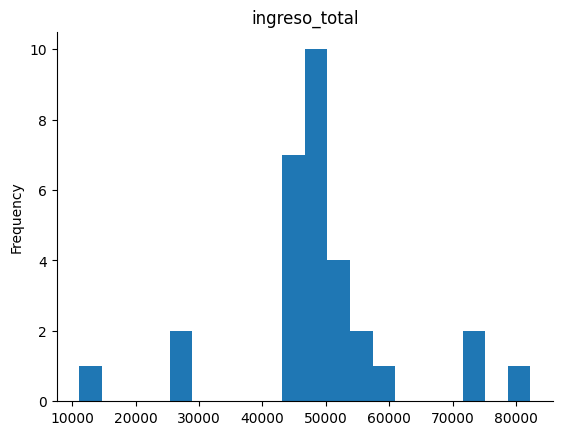

In [ ]:
#Generación de un gráfico de barras con el ingreso total
from matplotlib import pyplot as plt
resumen_prod['ingreso_total'].plot(kind='hist', bins=20, title='ingreso_total')
plt.gca().spines[['top', 'right',]].set_visible(False)

**Resumen:**
El producto con mayor ingreso total es "LAMPARA DE MESA" con $82.276,38. En segundo lugar están los "AURICULARES" por $ 74.175,58 y el tercer lugar lo ocupa "MICROONDAS" con $72.562,89

In [115]:
# 4️⃣ Calcular percentil 80 de ingreso_total
# --------------------------------------------------------
# La función quantile() nos permite obtener el valor de un percentil.
# En este caso, queremos saber el ingreso que separa al 80% de los productos
# con menores ingresos del 20% con mayores ingresos.

p80_ingreso = resumen_prod["ingreso_total"].quantile(
    q=0.80,                # q indica el percentil deseado (0.80 = 80% de los datos por debajo)
    interpolation="linear" # si el percentil no coincide exactamente con un valor real del dataset,
                           # 'linear' interpola entre los dos valores vecinos.
                           # Ejemplo: si el 80% cae entre 4000 y 5000,
                           # calcula un valor proporcional, por ejemplo 4200.
                           # Otros métodos posibles:
                           #  - 'lower': toma el menor de los dos valores (4000)
                           #  - 'higher': toma el mayor (5000)
                           #  - 'nearest': el más cercano al percentil
                           #  - 'midpoint': el punto medio exacto (4500)
)

# En resumen:
# - quantile calcula el valor límite de un percentil.
# - q define qué percentil queremos.
# - interpolation define cómo se calcula cuando el valor no está exactamente en los datos.
# El resultado (p80_ingreso) es el ingreso total que marca el límite superior del 80% de los productos.

#se muestra el percentil
print("El valor del percentil es: ", p80_ingreso)

El valor del percentil es:  52518.848000000005


In [116]:
# 5️⃣ Filtrar los productos "de alto rendimiento" y ordenarlos
# -------------------------------------------------------------------
# Contexto: `resumen_prod` es un DataFrame con métricas por producto,
# y `p80_ingreso` es el percentil 80 de la columna "ingreso_total".
# Objetivo: quedarnos con los productos cuyo ingreso_total está en el 20% superior
# (ingreso_total >= p80_ingreso) y luego ordenarlos de mayor a menor por ingreso y unidades.
#en una sola fila
#ventas_top = (resumen_prod.query("ingreso_total >= @p80_ingreso",engine="python").sort_values(by=["ingreso_total", "unidades"],ascending=[False, False],na_position="last",ignore_index=True))
ventas_top = (
    resumen_prod
    # ---------------------------------------------------------------
    # .query(expr, *, inplace=False, engine='python'|'numexpr')
    #   - Aplica un filtro usando una expresión estilo SQL-simple.
    #   - `expr` es un string que se evalúa sobre los nombres de las columnas.
    #   - Para usar variables de Python (no columnas), se antepone '@' (ej.: @p80_ingreso).
    #   - NaN en comparaciones (>, >=, ==, etc.) se comportan como False → esas filas no pasan el filtro.
    #   - engine='python': interpreta la expresión con Python puro (compatible siempre).
    #   - engine='numexpr': si está instalado, acelera operaciones numéricas vectorizadas.
    #   - inplace: False (por defecto) devuelve un DF nuevo; True modifica el DF original (menos recomendado en cadenas).
    .query(
        "ingreso_total >= @p80_ingreso",  # expr: filtra filas donde ingreso_total es al menos el umbral del P80
        engine="python"                   # motor de evaluación (usar 'numexpr' si lo tenés y querés performance)
        # Notas de sintaxis de `expr`:
        #   • Operadores lógicos: and / or / not   (también valen &, |, ~ con paréntesis).
        #   • Strings deben ir entre comillas: canal == 'Online'
        #   • Columnas con espacios o caracteres raros: usar `backticks`, ej.: `nombre producto` == 'X'
        #   • Ejemplos:
        #       "ingreso_total >= @p80_ingreso and unidades >= 10"
        #       "`nombre producto`.str.contains('Promo')"
        #       "precio_promedio.between(1000, 3000, inclusive='both')"
    )
    # ---------------------------------------------------------------
    # .sort_values(by, axis=0, ascending=True|[...], inplace=False,
    #              kind='quicksort'|'mergesort'|'heapsort'|'stable',
    #              na_position='last'|'first', ignore_index=False, key=None)
    #   - Ordena por una o varias columnas.
    #   - `by`: str o lista de str con las columnas a ordenar.
    #   - `ascending`: bool o lista de bool (una por cada columna en `by`).
    #   - `na_position`: dónde ubicar NaN ('last' o 'first').
    #   - `ignore_index`: si True, reasigna el índice 0..n-1 en el resultado.
    #   - `kind`: algoritmo de ordenamiento (mergesort es estable si necesitás preservar empates).
    #   - `key`: función que transforma los valores antes de ordenar (p. ej., key=lambda s: s.str.normalize(...)).
    .sort_values(
        by=["ingreso_total", "unidades"],  # primero ordena por ingreso_total, luego desempata por unidades
        ascending=[False, False],          # ambos en orden descendente (mayor → menor)
        na_position="last",                # coloca NaN al final (útil si alguna métrica quedó en NaN)
        ignore_index=True                  # reindexa el resultado secuencialmente (0..n-1)
        # Variantes útiles:
        #   • ascending=True                 # orden ascendente
        #   • ascending=[False, True]        # primero desc, luego asc para el segundo criterio
        #   • kind='mergesort'               # orden estable (respeta el orden de aparición en empates)
        #   • key=lambda s: s.str.lower()    # ordenar texto sin distinción de mayúsculas/minúsculas
    )
)

# Resultado:
# `ventas_top` contiene solo los productos cuyo ingreso_total >= p80_ingreso,
# ordenados de mayor a menor por ingreso_total y, ante empates, por unidades.


In [117]:
# 6️⃣ Se muestran los resultados de la aplicación del punto anterior
print(f"Columna de producto detectada: {prod_col}")
print(f"Umbral (percentil 80) de ingreso_total: {float(p80_ingreso):,.2f}")
print("✅ Productos de ALTO RENDIMIENTO (top 20% por ingreso):")
display(ventas_top.head(20))

Columna de producto detectada: producto
Umbral (percentil 80) de ingreso_total: 52,518.85
✅ Productos de ALTO RENDIMIENTO (top 20% por ingreso):


,producto,ingreso_total,unidades,precio_promedio,registros
0,LÁMPARA DE MESA,82276.38,1112,72.72,176
1,AURICULARES,74175.58,958,76.30,143
2,MICROONDAS,72562.89,912,79.18,135
3,CAFETERA,59607.31,765,79.05,117
4,CUADRO DECORATIVO,54297.6,726,74.58,100
5,SMARTPHONE,54132.44,665,81.40,101


### 6️⃣ Agregación

**Objetivo**:

*Construir un resumen por categoría de producto con métricas útiles (ingreso total, unidades, cantidad de ventas, ticket promedio).*

* Resumir las ventas por categoría de producto y analizar los ingresos generados.
* Sugerencia: usar .groupby() y .agg() para generar métricas como suma y promedio.

Conceptos clave:

*Agregación: operación que resume muchas filas en menos filas, aplicando funciones (sum, mean, count, etc.) después de agrupar por una clave (aquí, la categoría).

*Categoría de producto: atributo que agrupa productos similares (ej., “Electrónica”, “Hogar”). Puede llamarse categoria, rubro, etc.

*Ticket promedio por venta: ingreso_total / ventas (dónde ventas es el conteo de filas en esa categoría). Indica el importe medio facturado por cada transacción/registro en la categoría.

> Nota: esto no es el “precio promedio” del producto; ese ya se calcula con mean sobre precio.

*Consideraciones: outliers pueden distorsionar promedios; a veces conviene mirar también la mediana (median).

*Plan paso a paso:*
1. Detectar la columna de categoría.
2. Asegurar columna ingreso (si no existe, crearla).
3. groupby(categoría).agg(...) para obtener métricas.
4. Ordenar por ingreso_total.
5. Calcular ticket_promedio_por_venta.

In [118]:
# Detectar columna de categoría (acepta variantes) invocando a la función "encontrar_columna"
cat_col = encontrar_columna(ventas_clean, ["category","categoria", "categoría", "categoria_producto", "rubro"])
if cat_col is None:
    print("No se encontró columna de categoría (por ej. 'categoria' o 'rubro').")
else:
    print("El nombre de la columna es: ",cat_col)

El nombre de la columna es:  categoria


In [120]:
display(ventas_clean.head())

,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,CUADRO DECORATIVO,69.94,5,2024-01-02,DECORACIÓN
1,811,LÁMPARA DE MESA,105.10,5,2024-01-02,DECORACIÓN
2,1156,SECADORA,97.96,3,2024-01-02,ELECTRODOMÉSTICOS
3,1372,HELADERA,114.35,8,2024-01-02,ELECTRODOMÉSTICOS
4,1546,SECADORA,106.21,4,2024-01-02,ELECTRODOMÉSTICOS


La columna ingreso no existe en ventas_clean, por lo que se creará

In [122]:
# Asegurar columna 'ingreso' (si no existe, crearla)
if "ingreso" not in ventas_clean.columns:
    ventas_cat = ventas_clean.assign(ingreso = ventas_clean["precio"] * ventas_clean["cantidad"])
else:
    ventas_cat = ventas_clean.copy()

display(ventas_cat.head())



,id_venta,producto,precio,cantidad,fecha_venta,categoria,ingreso
0,792,CUADRO DECORATIVO,69.94,5,2024-01-02,DECORACIÓN,349.7
1,811,LÁMPARA DE MESA,105.10,5,2024-01-02,DECORACIÓN,525.5
2,1156,SECADORA,97.96,3,2024-01-02,ELECTRODOMÉSTICOS,293.88
3,1372,HELADERA,114.35,8,2024-01-02,ELECTRODOMÉSTICOS,914.8
4,1546,SECADORA,106.21,4,2024-01-02,ELECTRODOMÉSTICOS,424.84


In [124]:
# Agregación por categoría con groupby + agg
resumen_cat = (
    ventas_cat
    .groupby(
        by=cat_col,      # Puede ser string o lista de strings si quisiéramos agrupar por varias columnas.
        dropna=False,    # Mantener grupo NaN (si hay filas sin categoría).
        as_index=False   # Dejar la categoría como columna normal (y no como índice).
        # observed: si cat_col es 'category' y queremos mostrar solo categorías presentes → True.
    )
    .agg(
        ingreso_total=('ingreso', 'sum'),   # Suma total de ingresos por categoría.
        unidades=('cantidad', 'sum'),       # Unidades totales vendidas en la categoría.
        ventas=('ingreso', 'size'),         # Cantidad de registros/filas (ventas) en la categoría.
        precio_promedio=('precio', 'mean')  # Precio promedio observado en la categoría.
        # Otras funciones útiles: 'median','max','min','std','var','nunique'...
    )
    .sort_values(
        by='ingreso_total', # Ordenar por ingreso total
        ascending=False,    # Descendente: mayores arriba
        na_position='last', # NaN al final
        ignore_index=True   # Reindexar desde 0
    )
    .round({'precio_promedio': 2}) # Round precio_promedio to 2 decimal places
)

display(resumen_cat)

,categoria,ingreso_total,unidades,ventas,precio_promedio
0,ELECTRODOMÉSTICOS,505299.63,6592,1000,76.52
1,ELECTRÓNICA,482577.8,6413,999,75.25
2,DECORACIÓN,479216.09,6490,1001,74.10


In [125]:
# Ticket promedio por venta = ingreso_total / ventas
resumen_cat = resumen_cat.assign(
    ticket_promedio_por_venta = (resumen_cat['ingreso_total'] / resumen_cat['ventas']).round(2)
    # assign: crea/reescribe columnas. Alternativa: resumen_cat['ticket_promedio_por_venta'] = ...
)

display(resumen_cat)

,categoria,ingreso_total,unidades,ventas,precio_promedio,ticket_promedio_por_venta
0,ELECTRODOMÉSTICOS,505299.63,6592,1000,76.52,505.3
1,ELECTRÓNICA,482577.8,6413,999,75.25,483.06
2,DECORACIÓN,479216.09,6490,1001,74.10,478.74


In [ ]:
#Mostrar los valores obtenidos por categoría
print("Columna de categoría detectada:", cat_col)
print("Resumen por categoría (ordenado por ingreso_total):")
display(resumen_cat.head(20))


Columna de categoría detectada: categoria
Resumen por categoría (ordenado por ingreso_total):


,categoria,ingreso_total,unidades,ventas,precio_promedio,ticket_promedio_por_venta
0,ELECTRODOMÉSTICOS,505299.63,6592,1000,76.52,505.3
1,ELECTRÓNICA,482577.8,6413,999,75.25,483.06
2,DECORACIÓN,479216.09,6490,1001,74.10,478.74


### 7️⃣ Integración de datos, opcional, NO OBLIGATORIO

* Combinar los sets de datos de ventas y marketing para obtener una visión más amplia de las tendencias.
* Sugerencia: usar pd.merge() especificando la clave común entre ambos DataFrames.
* Documentar cualquier observación relevante sobre la combinación de datos.

In [126]:
# ============================================
# INTEGRACIÓN SIMPLE: combinar ventas y marketing
# ============================================
# Qué hace:
# - Busca una clave común sencilla para unir (por nombre típico).
# - Si no la encuentra, te deja dos variables para definirla a mano.
# - Calcula la cardinalidad real (1:1, 1:m, m:1, m:m) y la valida en el merge.
# - Hace un LEFT JOIN (conserva todas las ventas).
# - Si hay 'campaña'/'canal', resume ingresos por esas columnas.
# ============================================


# ---------------------------
# 1) Intento SIMPLE de detectar una clave común
# ---------------------------
claves_tentativas = [
    "id_cliente", "cliente", "email",
    "id_campaña", "id_campana", "id_campanha",
    "sku", "id_producto", "producto"
]

# Busca la primera clave que exista con el mismo nombre en ambos DataFrames
clave_comun = next(
    (k for k in claves_tentativas if k in ventas_clean.columns and k in marketing_clean.columns),
    None
)

print("La clave encontrada en común es: ", clave_comun)

La clave encontrada en común es:  producto


In [127]:
# ---------------------------
# 2) Si NO hay clave exactamente igual en ambos, pedimos definir a mano
#    (esto NO corta el flujo: imprime guía y sigue si las completas)
# ---------------------------
# 👇 Cambiá estos nombres si tus columnas se llaman distinto en cada DF:
clave_ventas = None   # ej.: "id_cliente" (en ventas_clean)
clave_marketing = None  # ej.: "cliente_id" (en marketing_clean)

# Si el usuario NO definió manualmente y TAMPOCO hay clave común, emitimos guía y salimos limpio
if clave_comun is None and (clave_ventas is None or clave_marketing is None):
    print("❌ No se encontró una clave común por nombre.")
    print("👉 Opciones:")
    print("   a) Renombrá una columna para que coincida en ambos DataFrames (ej.: 'id_cliente').")
    print("   b) Definí manualmente las variables 'clave_ventas' y 'clave_marketing' más arriba.")
    print("      Ejemplo: clave_ventas='id_cliente'  |  clave_marketing='cliente_id'")
    # Evitamos romper el notebook
else:
    # ---------------------------
    # 3) Determinar las columnas de unión y calcular cardinalidad REAL
    # ---------------------------
    if clave_comun is not None:
        # Caso simple: misma columna en ambos
        left_on = [clave_comun]
        right_on = [clave_comun]
        clave_label = clave_comun
    else:
        # Caso manual: columnas diferentes
        left_on = [clave_ventas]
        right_on = [clave_marketing]
        clave_label = f"{clave_ventas} (ventas) ↔ {clave_marketing} (marketing)"

    # Función de ayuda: ¿hay duplicados en la(s) clave(s)?
    def hay_duplicados(df, cols):
        # cols puede tener 1 o más columnas (clave compuesta)
        return df.duplicated(subset=cols, keep=False).any()

    # Detectar cardinalidad:
    # - Si ventas no duplica clave y marketing sí → 1:m
    # - Si ventas sí duplica y marketing no → m:1
    # - Si ninguno duplica → 1:1
    # - Si ambos duplican → m:m
    dup_left = hay_duplicados(ventas_clean, left_on)
    dup_right = hay_duplicados(marketing_clean, right_on)

    if not dup_left and not dup_right:
        validate_card = "1:1"
    elif not dup_left and dup_right:
        validate_card = "1:m"
    elif dup_left and not dup_right:
        validate_card = "m:1"
    else:
        validate_card = "m:m"

    print("🔑 Clave de unión:", clave_label)
    print("📐 Cardinalidad detectada:", validate_card)


🔑 Clave de unión: producto
📐 Cardinalidad detectada: m:m


In [128]:
    # ---------------------------
    # 4) Hacer el MERGE (LEFT JOIN)
    # ---------------------------
    ventas_marketing = pd.merge(
        left=ventas_clean,      # DataFrame izquierdo: base principal (ventas)
        right=marketing_clean,  # DataFrame derecho: datos de marketing a anexar
        how="left",             # how: 'left' (todas ventas), 'inner', 'outer', 'right'
        left_on=left_on,        # columnas de unión en 'left' (lista)
        right_on=right_on,      # columnas de unión en 'right' (lista)
        # on=...               # (alternativa si la columna tiene EXACTAMENTE el mismo nombre en ambos; excluyente con left_on/right_on)
        sort=False,             # sort: True ordena por clave tras el merge; False suele ser más rápido
        suffixes=("_ven", "_mkt"),  # sufijos para columnas con el mismo nombre en ambos DF
        copy=True,              # copy: True asegura copia (seguro); False puede ahorrar memoria
        indicator=True,         # indicator: agrega columna '_merge' con 'left_only'|'right_only'|'both'
        validate=validate_card  # validate: '1:1'|'1:m'|'m:1'|'m:m' → lanza error si no se cumple
    )

    # Diagnóstico básico del resultado
    print("\n📋 Origen de filas según '_merge':")
    display(ventas_marketing['_merge'].value_counts(dropna=False).to_frame('conteo'))

    print("\n👀 Primeras filas del DataFrame unificado:")
    display(ventas_marketing.head())




📋 Origen de filas según '_merge':


,conteo
_merge,
both,9000
left_only,0
right_only,0



👀 Primeras filas del DataFrame unificado:


,id_venta,producto,precio,cantidad,fecha_venta,categoria,id_campanha,canal,costo,fecha_inicio,fecha_fin,_merge
0,792,CUADRO DECORATIVO,69.94,5,2024-01-02,DECORACIÓN,1,RRSS,5.27,2024-04-27,2024-06-04,both
1,792,CUADRO DECORATIVO,69.94,5,2024-01-02,DECORACIÓN,31,EMAIL,5.28,2024-08-15,2024-09-12,both
2,792,CUADRO DECORATIVO,69.94,5,2024-01-02,DECORACIÓN,61,TV,5.30,2024-11-05,2024-12-23,both
3,811,LÁMPARA DE MESA,105.10,5,2024-01-02,DECORACIÓN,32,EMAIL,5.54,2024-03-28,2024-04-20,both
4,811,LÁMPARA DE MESA,105.10,5,2024-01-02,DECORACIÓN,2,RRSS,5.88,2024-05-30,2024-06-29,both


In [129]:
    # ---------------------------
    # 5) Resumen por CAMPAÑA / CANAL (si existen esas columnas)
    # ---------------------------
    # Asegurar 'ingreso' = precio * cantidad si no existe
    vm = ventas_marketing.copy()
    if "ingreso" not in vm.columns and {"precio", "cantidad"}.issubset(vm.columns):
        vm = vm.assign(ingreso = vm["precio"] * vm["cantidad"])

    # Detectar posibles columnas de campaña/canal por nombres comunes
    def hallar_col(df, patrones):
        for c in df.columns:
            if any(p in c.lower() for p in patrones):
                return c
        return None

    camp_col  = hallar_col(vm, ["campaña", "campana", "id_campaña", "id_campana", "id_campanha", "campaign"])
    canal_col = hallar_col(vm, ["canal", "utm_source", "fuente", "source"])

    if camp_col and "ingreso" in vm.columns:
        resumen_camp = (
            vm.groupby(by=camp_col, dropna=False, as_index=False)  # groupby: agrupa por campaña
              .agg(
                  ingreso_total=('ingreso', 'sum'),  # sum: suma de ingresos por campaña
                  ventas=('ingreso', 'size')         # size: cantidad de filas (ventas) por campaña
              )
              .sort_values(by='ingreso_total', ascending=False, na_position='last', ignore_index=True)
        )
        print(f"\n💡 Ingreso total por campaña ({camp_col}):")
        display(resumen_camp.head(20))
    else:
        print("\nℹ️ No se encontró columna de campaña o no está 'ingreso' para resumir.")

    if canal_col and "ingreso" in vm.columns:
        resumen_canal = (
            vm.groupby(by=canal_col, dropna=False, as_index=False)
              .agg(
                  ingreso_total=('ingreso', 'sum'),
                  ventas=('ingreso', 'size')
              )
              .sort_values(by='ingreso_total', ascending=False, na_position='last', ignore_index=True)
        )
        print(f"\n💡 Ingreso total por canal ({canal_col}):")
        display(resumen_canal.head(20))
    else:
        print("ℹ️ No se encontró columna de canal o no está 'ingreso' para resumir.")




💡 Ingreso total por campaña (id_campanha):


,id_campanha,ingreso_total,ventas
0,2,82276.38,176
1,32,82276.38,176
2,62,82276.38,176
3,77,74175.58,143
4,47,74175.58,143
5,17,74175.58,143
6,26,72562.89,135
7,56,72562.89,135
8,86,72562.89,135
9,19,59607.31,117



💡 Ingreso total por canal (canal):


,canal,ingreso_total,ventas
0,EMAIL,1467093.52,3000
1,RRSS,1467093.52,3000
2,TV,1467093.52,3000
